# Universidade de Brasília - UnB

Campus UnB Gama - FGA

CURSOS: Engenharia de Software e Engenharia Eletrônica

DISCIPLINA: Tópicos Especiais em Software e Eletrônica

CONTEÚDO: Métodos Quantitativos em Finanças

ALUNO: Eduardo Sousa S. Rodrigues MATRÍCULA: 140038558

## Trabalho 1

### 1) Considerando os índices da Bovespa, pertencente aos conjuntos Setorial ou por Segmento, (i) escolha aos seu critério 5 (cinco) índices e entre esses escolhidos os 5 (cinco) papeis mais líquidos. http://www.bmfbovespa.com.br/pt_br/produtos/indices/

Os índices escolhidos são do conjunto Setorial, mais especificamente os que compõem a carteira do IMOB( Índice Imobiliário): http://www.bmfbovespa.com.br/pt_br/produtos/indices/indices-setoriais/indice-bm-fbovespa-imobiliario-imob-composicao-da-carteira.htm 

Para definir os 5 mais Líquidos, foi calculadada a média de volume diário de cada índice. Os que obtiveram maior volume diário médio, teoricamente possuem maior liquidez.

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Set 21 09:11:31 2018

@author:Eduardo S. Sales
Universidade de Brasilia - UnB
"""
%matplotlib notebook 
#import plotly.plotly as py
#import plotly.graph_objs as go
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
#import matplotlib.dates as mdates
#import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc
#from matplotlib.finance import candlestick_ohlc
#import urllib
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import fix_yahoo_finance as yf
import datetime as dt
import seaborn as sns
sns.set()

In [5]:
def yahoo(symbols,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year):
    yf.pdr_override()        
    stocks_yahoo = pdr.get_data_yahoo(symbols, start=datetime(S_Year, S_Month, S_Day), end=datetime(E_Year, E_Month, E_Day),   as_panel = False,)
    return stocks_yahoo

# Índices da Carteira IMOB
Stocks=['ALSC3','BRML3', 'BRPR3','CYRE3','DIRR3','EVEN3','EZTC3','GFSA3','HBOR3','IGTA3','MRVE3','MULT3','TEND3']
Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]

N_months=24
today = dt.date.today()
E_Day = today.day; E_Month = today.month; E_Year = today.year
day_before=today - dt.timedelta(days=N_months*365/12)
S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

stocks_all=yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)
stocks_all

[*********************100%***********************]  13 of 13 downloaded


Open                                                \
             ALSC3.SA  BRML3.SA BRPR3.SA CYRE3.SA DIRR3.SA EVEN3.SA   
Date                                                                  
2016-10-03  15.610000  10.64350     8.54    10.35     5.77     3.85   
2016-10-04  15.700000  10.91300     8.55    10.55     5.98     3.96   
2016-10-05  15.810000  11.04350     8.53    10.35     5.80     3.95   
2016-10-06  15.990000  11.04350     8.58    10.51     5.71     3.94   
2016-10-07  16.070000  11.07830     8.49    10.64     5.65     3.98   
2016-10-10  16.020000  11.26960     8.58    10.74     5.78     4.02   
2016-10-11  15.750000  11.26090     8.59    10.84     5.67     4.01   
2016-10-13  15.840000  11.05220     8.55    10.86     5.68     3.96   
2016-10-14  15.820000  11.24350     8.61    10.77     5.56     4.03   
2016-10-17  16.120001  11.14780     8.51    10.82     5.49     4.05   
2016-10-18  16.600000  11.39130     8.55    10.65     5.50     4.16   
2016-10-19  16.850000  11.73910     8.53    10.77     5.52     4.31   
2016-10-20  16.709999  11.94780     8.65    10.77     5.68     4.25   
2016-10-21  16.980000  11.78260     8.56    10.70     5.45     4.25   
2016-10-24  16.860001  11.66960     8.59    10.67     5.55     4.37   
2016-10-25  17.010000  11.67830     8.63    11.11     5.57     4.33   
2016-10-26  16.870001  11.55650     8.53    10.87     5.56     4.35   
2016-10-27  16.680000  11.48700     8.71    10.88     5.67     4.51   
2016-10-28  16.889999  11.30430     8.60    10.83     5.71     4.32   
2016-10-31  16.370001  11.27830     8.58    10.84     5.61     4.39   
2016-11-01  16.750000  11.15650     8.54    10.76     5.50     4.44   
2016-11-03  16.260000  10.73040     8.60    10.63     5.40     4.30   
2016-11-04  15.920000  10.59130     8.45    10.36     5.11     4.21   
2016-11-07  15.860000  10.53040     8.63    10.35     5.25     4.23   
2016-11-08  16.160000  10.77390     8.77    10.79     5.43     4.51   
2016-11-09  16.040001  10.09560     8.91    10.70     5.25     4.22   
2016-11-10  16.190001  10.43480     8.96    10.85     5.15     4.51   
2016-11-11  15.350000   9.55652     8.25     9.97     5.00     4.15   
2016-11-14  14.520000   9.13913     7.80     9.13     4.55     3.95   
2016-11-16  14.680000   9.34783     7.63     9.09     4.51     4.03   
...               ...       ...      ...      ...      ...      ...   
2018-08-20  14.990000   9.40000     8.49    11.24     6.81     3.73   
2018-08-21  15.300000   9.36000     8.33    11.07     6.80     3.69   
2018-08-22  14.700000   9.11000     8.72    10.70     6.72     3.50   
2018-08-23  14.870000   9.35000     8.87    11.00     6.84     3.59   
2018-08-24  14.780000   9.17000     8.96    10.96     6.85     3.52   
2018-08-27  14.880000   9.17000     8.98    10.67     6.65     3.50   
2018-08-28  15.180000   9.38000     9.02    10.85     6.91     3.52   
2018-08-29  15.230000   9.44000     8.97    10.91     6.86     3.51   
2018-08-30  15.240000   9.39000     8.82    10.90     6.85     3.49   
2018-08-31  14.790000   9.13000     9.23    10.75     6.78     3.45   
2018-09-03  15.120000   9.06000     9.10    10.78     6.74     3.47   
2018-09-04  14.970000   9.19000     8.99    10.73     6.90     3.43   
2018-09-05  14.640000   9.09000     9.00    10.64     6.68     3.37   
2018-09-06  14.730000   9.14000     8.97    10.68     6.71     3.39   
2018-09-10  14.920000   9.30000     8.85    10.83     6.76     3.41   
2018-09-11  14.400000   9.22000     8.70    10.55     6.72     3.36   
2018-09-12  14.240000   9.14000     8.58    10.42     6.63     3.30   
2018-09-13  14.260000   9.38000     8.41    10.35     6.55     3.33   
2018-09-14  13.990000   9.32000     8.25    10.10     6.43     3.30   
2018-09-17  14.080000   9.32000     8.44    10.31     6.36     3.20   
2018-09-18  14.260000   9.62000     8.56    10.41     6.46     3.21   
2018-09-19  14.470000   9.70000     8.47    10.45     6.60     3.18   
2018-09-20  14.370000   9.75000     8.44 

In [6]:
stocks_volume = stocks_all['Volume'] # Apenas os Volumes diários de cada índice.
stocks_volume 

ALSC3.SA  BRML3.SA  BRPR3.SA  CYRE3.SA  DIRR3.SA  EVEN3.SA  \
Date                                                                     
2016-09-27    637500   2896505    481000   2140600    501300    529600   
2016-09-28    383200   3364095    481100   3635500    522800    664700   
2016-09-29    230600   3741985   1158800   1760800    571300    555500   
2016-09-30    419600   5047235    413500   1642600    501800    429200   
2016-10-03    515800   7689935    559100   2189100    311700    571500   
2016-10-04    344400   7061000    213900   1125400   1314700    303400   
2016-10-05    310000   3243345    144400   1844200    745600    294700   
2016-10-06    198900   4269375    292400   1064400    806900    338300   
2016-10-07    939200  10179685    191600   1836500    547200    484000   
2016-10-10    463300   3587425    411300   1135100    522800    319900   
2016-10-11    247400   5806810    390200   1388200    421000    329800   
2016-10-13    266200   7994685    438200   2259700    513600    933300   
2016-10-14    518700   6634810    328600   1484900    680200    822500   
2016-10-17    601400  11259650    393800   1899000    609300    483500   
2016-10-18    986600   8348655    596500   1847700    763100   1049000   
2016-10-19    983600   9005190    304700   2236400    470200    611000   
2016-10-20    490200   8757135    217600   1974600   3779500    570100   
2016-10-21   1116000   5877535    151200   3881200    902200   1639700   
2016-10-24    350800   4777330    335500   3862800    423400    407800   
2016-10-25    604100   4735355    189800   3282200    389900    736700   
2016-10-26    334200   4326300    415000   2751600    480400    778900   
2016-10-27    658600   3707715    262300   1631400    291000   1195300   
2016-10-28    295600   7436820    248600   2288100    229000    296000   
2016-10-31    310700   4829540    305600   5516300    518800    302500   
2016-11-01    459300   5548980    433300   2144600    546300    410500   
2016-11-03    397300   8876620    253500   3594700    880000    856500   
2016-11-04    360200   9579730    241000   2185800    736300    281600   
2016-11-07    211300   9349730    400400   3376400    551900   1932200   
2016-11-08    280500   6152155   1096500   2400300    430500    717200   
2016-11-09    587600   6154915    442100   2687600    550100    800200   
...              ...       ...       ...       ...       ...       ...   
2018-08-15    437300   6080800    837900   1880200    509100    505700   
2018-08-16    345200   4189300    390700   1366700    584400    422000   
2018-08-17    365400   3921100    338800   1262600    504200   1355200   
2018-08-20    761100   4152500    160400   1186900    499000    201500   
2018-08-21    557000   6553500    370600   2674900    609200   1297600   
2018-08-22    127000   4122400   1097000   2622200    565600    481300   
2018-08-23    751100   3698400    552600   1375900    601100    456300   
2018-08-24    477500   6448500    129500   1766500    806900    799600   
2018-08-27    722400   6282200    252000   1538700    628500    235000   
2018-08-28    657900   2943200    313100   1542300    390600    447700   
2018-08-29    720400   4002400    123900   1595900    381600    590100   
2018-08-30    433000   5521400    176400   1007900    380600    622300   
2018-08-31    531700   7720400    382600   1617500    681200    321400   
2018-09-03    174500   2510200    129100   1167500    183200     92200   
2018-09-04    655400  10294200    196900   2352300   1084200    436300   
2018-09-05    353400   4208200    210600   2038800    560000    328300   
2018-09-06    387900   9400800    218600   1584300    571300    586000   
2018-09-10    599300   4698200    218400   1903900    955100    213300   
2018-09-11    584700   3362000    227700   2763000    774900    255200   
2018-09-12    475800   5624100    359400   1626100    602700    321800   
2018-09-13    500600   7606900     99100   3146400    785100    211000   
2018-09-14    47

In [7]:
media_volume = stocks_volume.fillna(0).mean()
mediaVolume = pd.DataFrame.from_dict(media_volume)
mediaVolume.columns=["Média"]
mediaVolume.sort_values('Média',ascending=False) #Organizados a partir dos que possuem média mais alta

Média
BRML3.SA  5.728642e+06
MRVE3.SA  2.900600e+06
MULT3.SA  2.274929e+06
CYRE3.SA  2.267105e+06
HBOR3.SA  1.503240e+06
IGTA3.SA  1.040188e+06
EVEN3.SA  8.373196e+05
GFSA3.SA  7.882541e+05
DIRR3.SA  7.543752e+05
BRPR3.SA  6.760529e+05
EZTC3.SA  5.476174e+05
ALSC3.SA  5.476069e+05
TEND3.SA  3.774008e+05

In [8]:

MaisLiquidos = mediaVolume.sort_values('Média',ascending=False).iloc[:5]
MaisLiquidos #5 índices mais líquidos dos 13 selecionados inicialmente

Média
BRML3.SA  5.728642e+06
MRVE3.SA  2.900600e+06
MULT3.SA  2.274929e+06
CYRE3.SA  2.267105e+06
HBOR3.SA  1.503240e+06

### 2) Identifique (ii) a correlação entre os preços e os retornos. E refaça a escolha dos papeis, de forma que a correlação entre eles nunca fique acima de 0.8.

Primeiro foi separado o 5 escolhidos, em seguida separado apenas o preço de fechamento par obter os retornos deles. Por fim foi feita a correlação entre os índices em relação aos retornos e em relação aos preçõs de fechamento.

In [32]:
Liquidos=['BRML3', 'CYRE3','HBOR3','MRVE3','MULT3']
Liquidos=[Liquidos[k]+'.SA' for k in range(len(Liquidos))]

N_months=24
today = dt.date.today()
E_Day = today.day; E_Month = today.month; E_Year = today.year
day_before=today - dt.timedelta(days=N_months*365/12)
S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

liquidos_all=yahoo(Liquidos,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)

liquidos = pd.DataFrame.from_dict(liquidos_all)

[*********************100%***********************]  5 of 5 downloaded


In [10]:
close = liquidos_all['Close'].fillna(0)
Close = pd.DataFrame.from_dict(close)

Close

BRML3.SA  CYRE3.SA  HBOR3.SA  MRVE3.SA   MULT3.SA
Date                                                         
2016-09-27   10.7391      9.82   1.98547     11.74  21.123301
2016-09-28   10.7913     10.17   2.01425     12.02  21.379999
2016-09-29   10.6261     10.12   2.05261     11.99  21.233299
2016-09-30   10.6957     10.23   1.96629     11.94  21.066700
2016-10-03   10.9565     10.46   1.94711     11.95  21.549999
2016-10-04   10.9913     10.38   1.87996     11.88  21.476700
2016-10-05   11.0956     10.51   1.83201     12.08  21.530001
2016-10-06   11.0261     10.59   1.87996     12.07  21.333300
2016-10-07   11.2609     10.69   1.84160     12.18  21.676701
2016-10-10   11.2435     10.85   1.85119     12.18  21.693300
2016-10-11   11.1130     10.85   1.85119     12.26  21.219999
2016-10-13   11.2087     10.75   1.85119     11.98  21.166700
2016-10-14   11.1478     10.81   1.91833     12.03  21.313299
2016-10-17   11.3826     10.61   1.90874     12.27  21.363300
2016-10-18   11.8000     10.83   1.88956     12.60  21.990000
2016-10-19   11.8870     10.80   1.93751     12.61  21.780001
2016-10-20   11.7826     10.75   2.08139     12.52  21.643299
2016-10-21   11.7304     10.67   2.11976     12.48  21.536699
2016-10-24   11.7565     11.06   2.04302     12.73  21.483299
2016-10-25   11.5652     10.97   1.97588     12.55  20.886700
2016-10-26   11.4783     10.85   1.93751     12.65  20.923300
2016-10-27   11.2609     10.92   1.91833     12.75  21.066700
2016-10-28   11.1565     10.92   1.95670     12.53  20.866699
2016-10-31   11.1130     10.75   1.94711     12.36  21.383301
2016-11-01   10.7826     10.64   1.80323     12.21  20.653299
2016-11-03   10.5130     10.30   1.70731     11.85  20.403299
2016-11-04   10.4348     10.33   1.68813     11.85  20.586700
2016-11-07   10.8348     10.80   1.71691     12.28  20.886700
2016-11-08   10.6087     10.93   1.69772     12.54  20.916700
2016-11-09   10.5217     10.88   1.66895     12.45  20.773300
...              ...       ...       ...       ...        ...
2018-08-15    9.7300     11.73   1.03000     13.60  18.920000
2018-08-16    9.6800     11.54   1.00000     13.40  18.959999
2018-08-17    9.4300     11.35   1.00000     13.14  18.660000
2018-08-20    9.4100     11.15   1.00000     13.13  18.780001
2018-08-21    9.1600     10.82   0.99000     13.05  18.309999
2018-08-22    9.3600     11.00   1.04000     13.15  18.709999
2018-08-23    9.0800     10.78   1.02000     12.95  18.309999
2018-08-24    9.1800     10.70   1.01000     12.87  18.490000
2018-08-27    9.4500     10.90   1.02000     13.14  19.110001
2018-08-28    9.4300     10.87   1.00000     13.10  18.930000
2018-08-29    9.4800     10.90   1.00000     13.20  19.150000
2018-08-30    9.2000     10.82   0.98000     12.84  18.930000
2018-08-31    9.1500     10.93   0.99000     13.00  18.629999
2018-09-03    9.1200     10.70   0.98000     13.00  18.559999
2018-09-04    9.0000     10.64   0.95000     12.65  18.430000
2018-09-05    9.0100     10.55   0.95000     12.50  18.600000
2018-09-06    9.3000     10.70   0.98000     12.73  18.559999
2018-09-10    9.4400     10.72   0.97000     12.60  18.500000
2018-09-11    9.0500     10.32   0.96000     12.22  18.190001
2018-09-12    9.3900     10.32   0.95000     12.48  18.090000
2018-09-13    9.3600     10.10   0.94000     12.14  17.959999
2018-09-14    9.3200     10.31   1.02000     12.15  17.930000
2018-09-17    9.6100     10.45   1.01000     12.18  18.450001
2018-09-18    9.8300     10.57   1.01000     12.38  18.580000
2018-09-19    9.6500     10.57   1.05000     12.65  18.540001
2018-09-20    9.6600     10.58   1.07000     12.13  18.480000
2018-09-21    9.8800     10.62   1.06000     12.29  18.910000
2018-09-24    9.5000     10.58   1.01000     12.10  18.480000
2018-09-25    9.4500     10.31   1.00000     11.80  18.290001
2018-09-26    9.5800     10.61   1.02000     12.01  18.280001

[505 rows x 5 columns]

In [11]:
retorno_BRML3 = Close['BRML3.SA'][1:].values/Close['BRML3.SA'][0:-1].values-1
retorno_CYRE3 = Close['CYRE3.SA'][1:].values/Close['CYRE3.SA'][0:-1].values-1
retorno_HBOR3 = Close['HBOR3.SA'][1:].values/Close['HBOR3.SA'][0:-1].values-1
retorno_MRVE3 = Close['MRVE3.SA'][1:].values/Close['MRVE3.SA'][0:-1].values-1
retorno_MULT3 = Close['MULT3.SA'][1:].values/Close['MULT3.SA'][0:-1].values-1
Retorno = {'R_BRML3': retorno_BRML3,
           'R_CYRE3': retorno_CYRE3,
           'R_HBOR3': retorno_HBOR3,
           'R_MRVE3': retorno_MRVE3,
           'R_MULT3': retorno_MULT3}
dfRetorno = pd.DataFrame(Retorno,index = Close.index[0:-1],columns =['R_BRML3','R_CYRE3','R_HBOR3','R_MRVE3','R_MULT3'])
dfRetorno.corr()


R_BRML3   R_CYRE3   R_HBOR3   R_MRVE3   R_MULT3
R_BRML3  1.000000  0.578115  0.415603  0.457841  0.686119
R_CYRE3  0.578115  1.000000  0.474284  0.579889  0.597475
R_HBOR3  0.415603  0.474284  1.000000  0.421487  0.411663
R_MRVE3  0.457841  0.579889  0.421487  1.000000  0.489399
R_MULT3  0.686119  0.597475  0.411663  0.489399  1.000000

In [12]:
Close.corr()

BRML3.SA  CYRE3.SA  HBOR3.SA  MRVE3.SA  MULT3.SA
BRML3.SA  1.000000  0.617980  0.844926  0.511011  0.920334
CYRE3.SA  0.617980  1.000000  0.403166  0.861166  0.684778
HBOR3.SA  0.844926  0.403166  1.000000  0.349609  0.702207
MRVE3.SA  0.511011  0.861166  0.349609  1.000000  0.596218
MULT3.SA  0.920334  0.684778  0.702207  0.596218  1.000000

### 3) Apresente (iii) os gráficos de preço no formato candlestick, (iv) o gráfico de retorno, (v) o índice Sharpe e o (vi) fator Beta com relação ao índice Bovespa.

In [41]:
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

In [42]:
def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    # Unfortunately, Yahoo's API is no longer available
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1


    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    #plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()

<IPython.core.display.Javascript object>


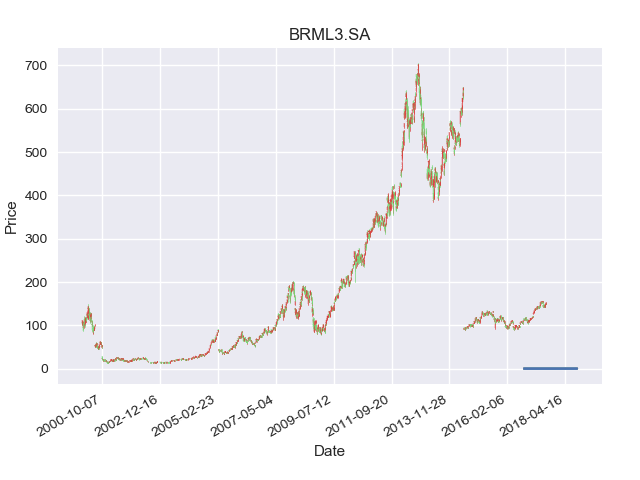

In [62]:
graph_data('BRML3.SA')


<IPython.core.display.Javascript object>


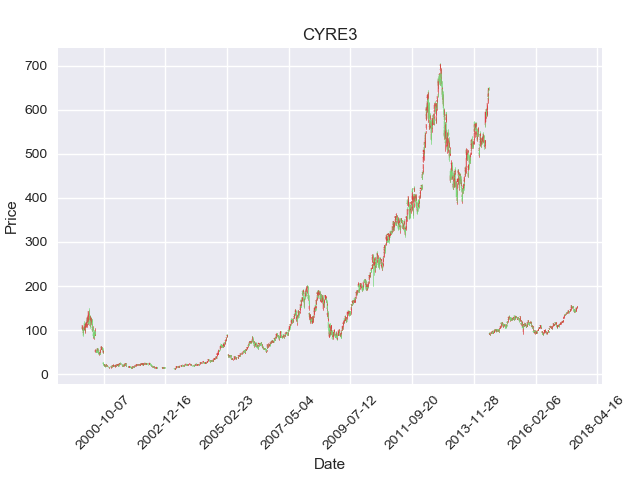

In [49]:
graph_data('CYRE3')

<IPython.core.display.Javascript object>


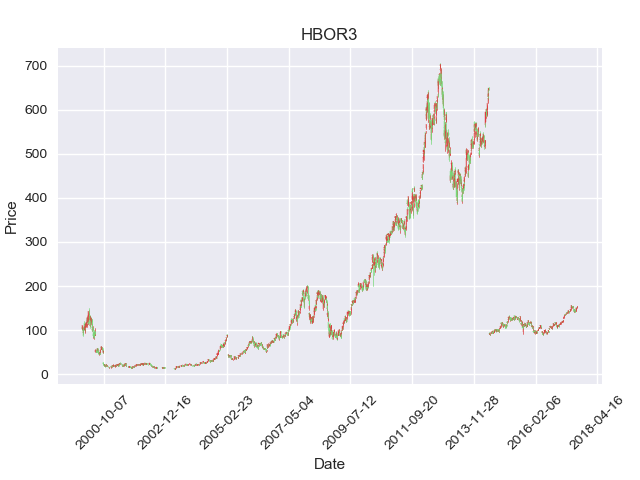

In [51]:
graph_data('HBOR3')

<IPython.core.display.Javascript object>


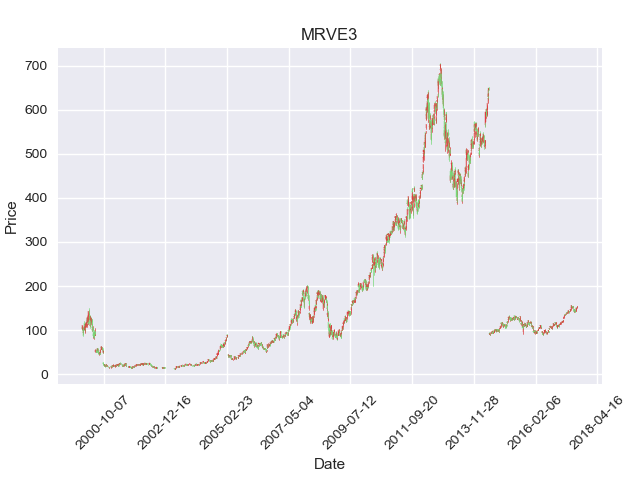

In [50]:
graph_data('MRVE3')

<IPython.core.display.Javascript object>


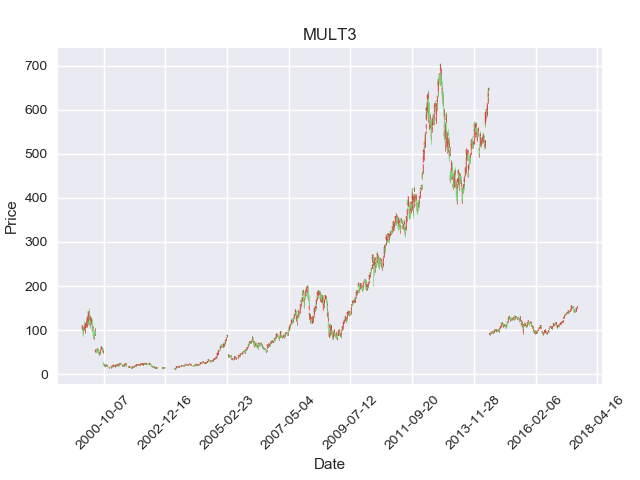

In [52]:
graph_data('MULT3')

<IPython.core.display.Javascript object>


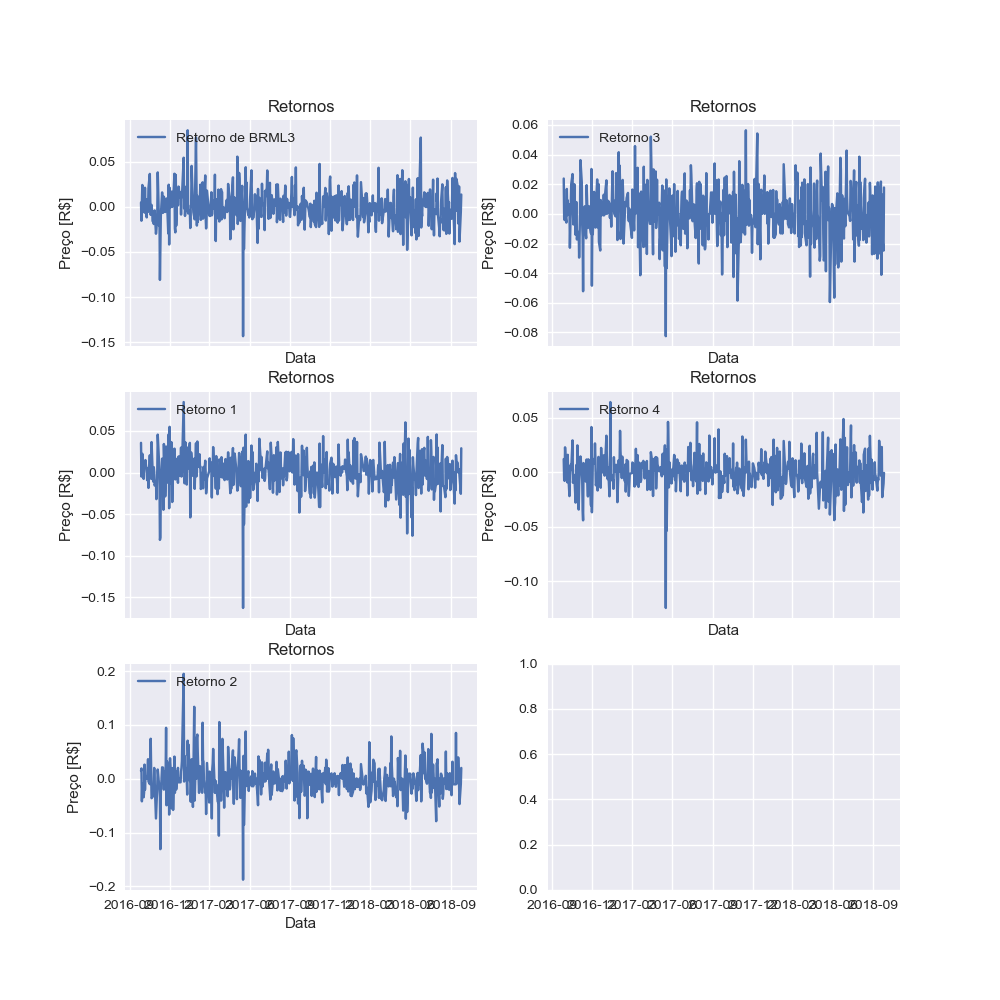

In [83]:
#fig = plt.subplots()
fig, ax = plt.subplots(nrows=3, ncols=2, sharex=True, figsize=(10,10))
ax[0,0].plot(dfRetorno['R_BRML3'], label='Retorno de BRML3')
ax[1,0].plot(dfRetorno['R_CYRE3'], label='Retorno 1')
ax[2,0].plot(dfRetorno['R_HBOR3'], label='Retorno 2')
ax[0,1].plot(dfRetorno['R_MRVE3'], label='Retorno 3')
ax[1,1].plot(dfRetorno['R_MULT3'], label='Retorno 4')

ax[0,0].set_ylabel("Preço [R$]")
ax[0,0].set_xlabel("Data")
ax[0,0].set_title("Retornos")
ax[0,0].legend(loc='upper left')


ax[1,0].set_ylabel("Preço [R$]")
ax[1,0].set_xlabel("Data")
ax[1,0].set_title("Retornos")
ax[1,0].legend(loc='upper left')


ax[2,0].set_ylabel("Preço [R$]")
ax[2,0].set_xlabel("Data")
ax[2,0].set_title("Retornos")
ax[2,0].legend(loc='upper left')

ax[0,1].set_ylabel("Preço [R$]")
ax[0,1].set_xlabel("Data")
ax[0,1].set_title("Retornos")
ax[0,1].legend(loc='upper left')


ax[1,1].set_ylabel("Preço [R$]")
ax[1,1].set_xlabel("Data")
ax[1,1].set_title("Retornos")
ax[1,1].legend(loc='upper left')
#plt.plot(dfRetorno['R_BRML3'])
